In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data=pd.read_csv("https://raw.githubusercontent.com/nityam1089/Gradient_Gains/refs/heads/main/Data/Dataset_1%20-%20Sheet1.csv")
data.head()

,House ID,House Area,Number of rooms,Price
0,1,6274,8,2100
1,2,6689,5,2200
2,3,4276,8,1400
3,4,5130,9,1700
4,5,6035,6,2000


In [30]:
X=data[['House Area','Number of rooms']].values
Y=data['Price'].values

In [31]:
u=np.mean(X,axis=0)
sigma=np.std(X,axis=0)
X_n=(X-u)/sigma
m=len(Y)
X_ready=np.hstack((np.ones((m,1)),X_n))
theta=np.zeros(X_ready.shape[1])
# X_ready

In [32]:
def cal_cost(X,Y,theta):
  m=len(Y)
  pred=X.dot(theta)

  errors=pred-Y
  cost=(1/(2*m))*np.sum(errors**2)
  return cost

In [33]:
def gradient_descent(X,Y,theta,alpha,it):
  m=len(Y)
  cost_history=[]

  for i in range(it):
    pred=X.dot(theta)
    errors=pred-Y
    gradient=(X.T.dot(errors))/ m
    theta=theta-alpha*gradient
    cost_history.append(cal_cost(X,Y,theta))

  return theta,cost_history

Final Weights (Theta): [1749.92445032  460.2273602     2.2178298 ]
Final Cost: 118.54653159108312


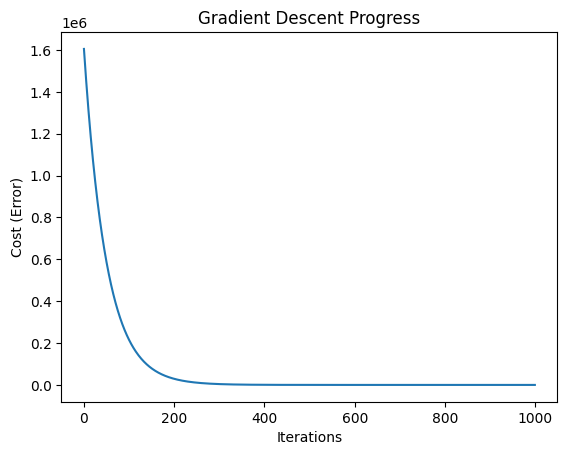

In [34]:
alpha=0.01
it=1000
theta_final,cost_history = gradient_descent(X_ready,Y,theta,alpha,it)
print("Final Weights (Theta):", theta_final)
print("Final Cost:", cost_history[-1])
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Error)")
plt.title("Gradient Descent Progress")
plt.show()